### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy.stats import zscore
sns.set_palette("magma")
sns.set_style("dark")

### Load the Data

In [2]:
df = pd.read_csv('datasets/final_df.csv')
df.drop(['Unnamed: 0','genre_list'],axis=1,inplace=True)
df.head()

,title,runtime,genres,rating,director,producer,cinematographer,writer,budget,domestic,...,Animation,Romance,War,Fantasy,Mystery,Sport,History,Thriller,Crime,Documentary
0,Lincoln,150.0,"Biography,Drama,History",7.4,Steven Spielberg,Kathleen Kennedy,Janusz Kaminski,Tony Kushner,65000000,182207973,...,0,0,0,0,0,0,1,0,0,0
1,Season of the Witch,95.0,"Action,Adventure,Fantasy",5.4,Dominic Sena,Charles Roven,Amir Mokri,Bragi F. Schut,40000000,24827228,...,0,0,0,1,0,0,0,0,0,0
2,Dallas Buyers Club,117.0,"Biography,Drama",8.0,Jean-Marc Vallée,Rachel Winter,Yves Bélanger,Craig Borten,5000000,27298285,...,0,0,0,0,0,0,0,0,0,0
3,Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,Christopher Nolan,Emma Thomas,Hoyte Van Hoytema,Jonathan Nolan,165000000,188017894,...,0,0,0,0,0,0,0,0,0,0
4,Flipped,90.0,"Comedy,Drama,Romance",7.7,Rob Reiner,Alan Greisman,Thomas Del Ruth,Andrew Scheinman,14000000,1755212,...,0,1,0,0,0,0,0,0,0,0


## FINDINGS

### 1. Most Popular Genre

In [3]:
def sorted_dict(target_dict,reverse=True):
    return dict(sorted(target_dict.items(), key=operator.itemgetter(1),reverse=reverse))

In [4]:
# get all genre names
all_columns = list(df.columns)
all_genres = all_columns[14:]

In [5]:
# count total movies in each genre

genres_dict = dict()
for col in all_genres:
    count = df[col].sum()
    genres_dict[col] = count
    
genres_dict = sorted_dict(genres_dict)
    
genres = list(genres_dict.keys())
genres_count = list(genres_dict.values())

Text(0.5, 0, 'Total Movies')

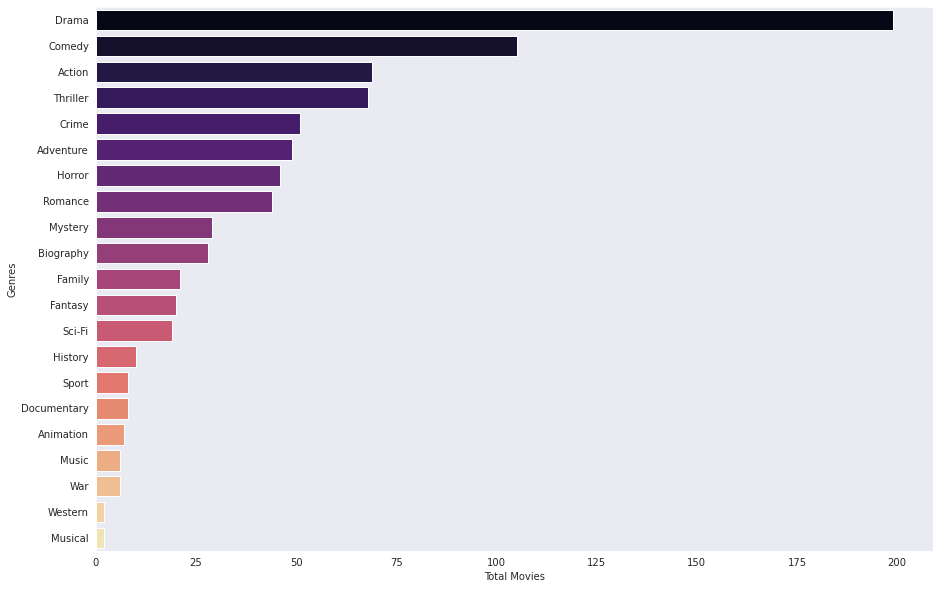

In [6]:
plt.figure(figsize=(15,10))

ax = sns.barplot(y=genres, x=genres_count,palette="magma")
ax.set_ylabel('Genres')
ax.set_xlabel('Total Movies')

_As Music, War, Western, Musical, History, Documantry, Sport and Animation have very less number of movies we might not get an actuall Idea on ROI so lets remove those movies._

In [7]:
genres_dict
genres_cols = [x for x in genres_dict if genres_dict[x] < 15]

[all_genres.remove(key) for key in genres_cols]

df.drop(genres_cols,axis=1,inplace=True)

_WE HAVE THE TOP GENRES ARE **['Thriller', 'Sci-Fi', 'Crime', 'Family', 'Action', 'Horror', 'Mystery', 'Adventure', 'Biography', 'Drama', 'Fantasy', 'Comedy', 'Romance']**_

_**Lets check what is the mean ROI on each genre**_

In [8]:
# Average ROI
roi_mean_genre = dict()
for genre in all_genres:
    average_ROI = int(round(df[(df[genre] == 1) & (df['ROI'] > 0)].ROI.mean()))
    roi_mean_genre[genre] = average_ROI
        
roi_mean_genre = sorted_dict(roi_mean_genre)
genres_roi = list(roi_mean_genre.keys())
mean_roi = list(roi_mean_genre.values())

Text(0.5, 1.0, 'Average ROI BY GENRES')

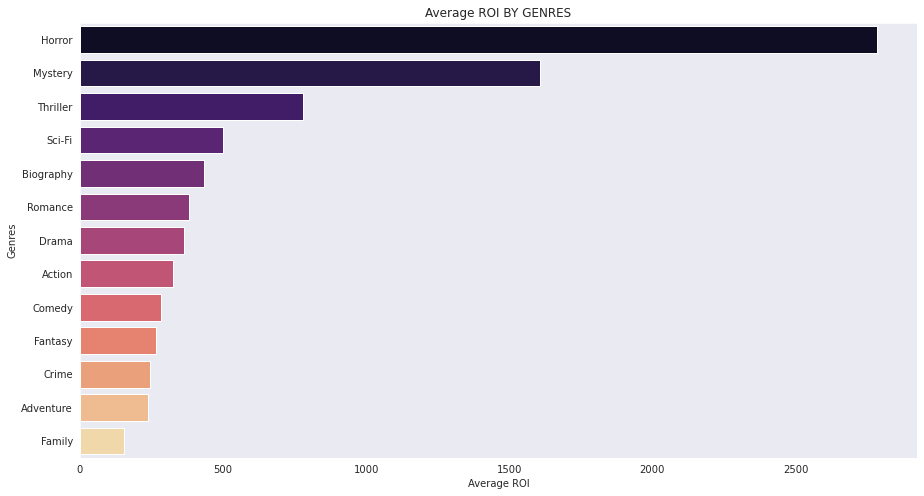

In [9]:
plt.figure(figsize=(15,8))

sns.barplot(y=genres_roi, x=mean_roi,palette="magma")
plt.ylabel('Genres')
plt.xlabel('Average ROI')
plt.title('Average ROI BY GENRES')

_**Horror has the highest ROI and is way beyond all other genre. There are chances that it might have outliers, lets check the box plot and remove outliers if any.**_

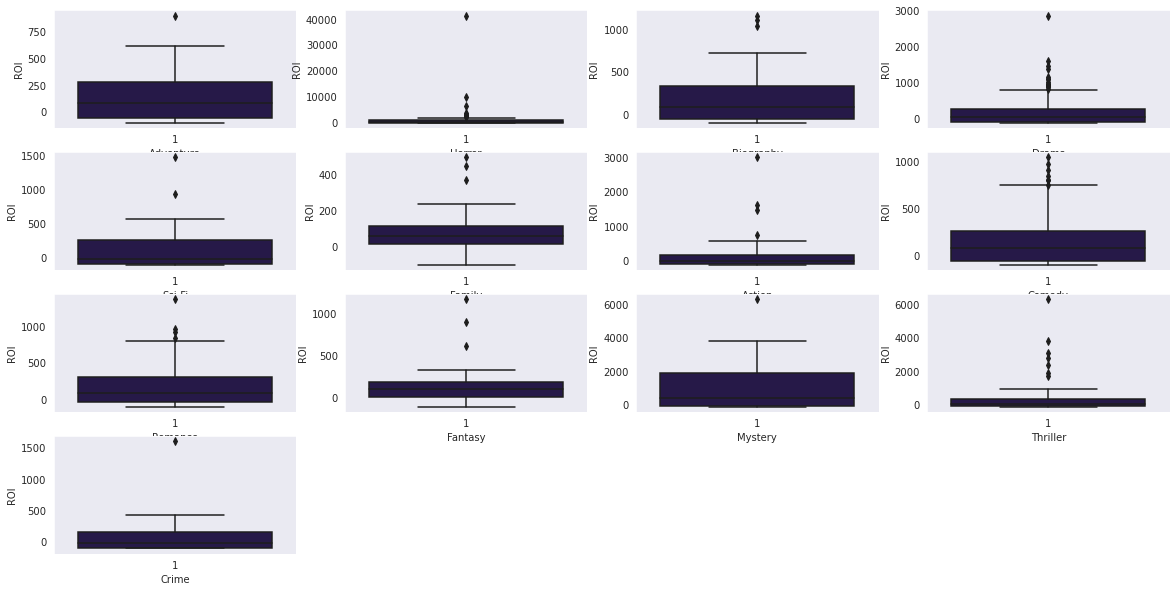

In [10]:
plt.subplots(figsize=(20,10))
for i,g in enumerate(all_genres):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df[df[g] == 1], x=g, y="ROI", showfliers = True)

In [11]:
# remove all data where ROI is within 2 standard daviation from the mean

df['ROI_zscore'] = zscore(df['ROI'])
df = df[df['ROI_zscore'] <= 2]
df.shape

(340, 28)

_Lets check the lowest, highest and average ROI based on Genre_

In [12]:
# MIN ROI

roi_min_genre = list()
for genre in all_genres:
    roi = int(round(df[(df[genre] == 1) & (df['ROI'] > 50)].ROI.min()))
    roi_min_genre.append(roi)

In [13]:
# MAX ROI

roi_max_genre = list()
for genre in all_genres:
    roi = int(round(df[(df[genre] == 1) & (df['ROI'] > 50)].ROI.max()))
    roi_max_genre.append(roi)

In [14]:
# MEAN ROI

roi_mean_genre = list()
for genre in all_genres:
    roi = int(round(df[(df[genre] == 1) & (df['ROI'] > 50)].ROI.mean()))
    roi_mean_genre.append(roi)

In [15]:
roi_min_max_df = pd.DataFrame({'genre':list(all_genres), 'min':roi_min_genre , 'max':roi_max_genre, 'mean':roi_mean_genre })
roi_min_max_df.sort_values(by=['max'], inplace=True, ascending=True)
roi_min_max_df

,genre,min,max,mean
5,Family,62,497,211
0,Adventure,50,904,282
7,Comedy,52,1050,322
2,Biography,90,1168,432
9,Fantasy,96,1168,347
8,Romance,64,1391,445
4,Sci-Fi,121,1474,499
12,Crime,62,1613,278
3,Drama,50,2876,417
6,Action,54,3002,387


Text(0, 0.5, 'Genres')

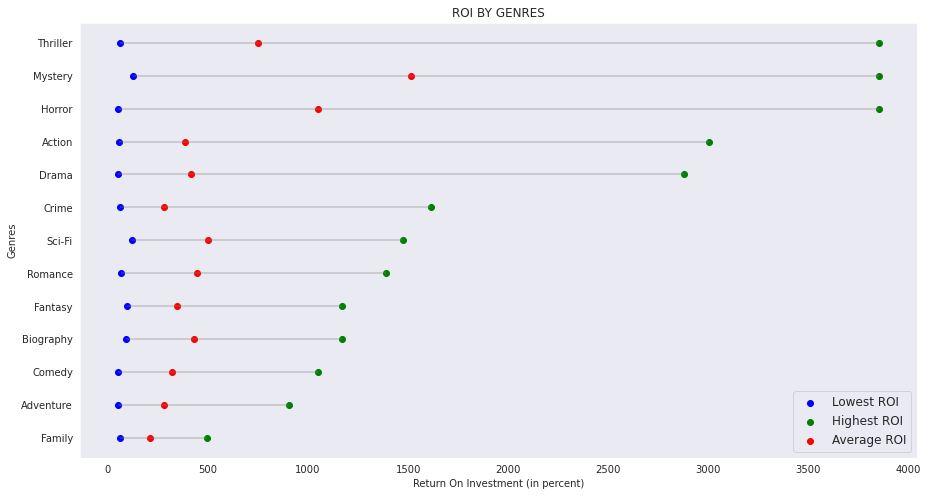

In [16]:
range_genre = range(1,len(roi_min_max_df) + 1)

plt.subplots(figsize=(15,8))


plt.hlines(y=range_genre, xmin=roi_min_max_df['min'], xmax=roi_min_max_df['max'], color='grey', alpha=0.4)
plt.scatter(roi_min_max_df['min'], range_genre, color='blue', alpha=1, label='Lowest ROI')
plt.scatter(roi_min_max_df['max'], range_genre, color='green', alpha=1 , label='Highest ROI')
plt.scatter(roi_min_max_df['mean'], range_genre, color='red', alpha=1, label='Average ROI')
plt.yticks(range_genre, roi_min_max_df['genre'])
plt.legend(prop={'size': 12})
plt.title('ROI BY GENRES')
plt.xlabel('Return On Investment (in percent)')
plt.ylabel('Genres')
# plt.savefig("")

_TOP 5 GENRE THAT HAS HIGHEST ROI ARE **['Thriller', 'Action', 'Horror', 'Mystery', 'Drama']**_

In [17]:
top_genres = ['Thriller', 'Action', 'Horror', 'Mystery', 'Drama']
df['genre_list'] = df['genres'].apply(lambda x: x.split(','))

In [18]:
genre_ = list()
rating_ = list()
for i, r in df.iterrows():
    if r['genre_list']:
        for g in r['genre_list']:
            if g in top_genres:
                genre_.append(g)
                rating_.append(df.loc[i,'rating']) 

In [19]:
df_ratings = pd.DataFrame({'genre':genre_,'rating':rating_})

/home/avithekkc/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


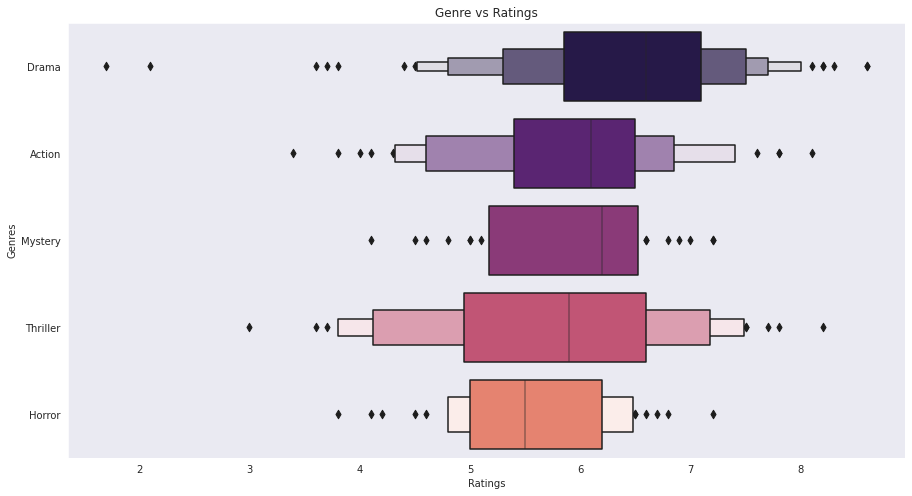

In [20]:
plt.subplots(figsize=(15,8))
sns.boxenplot(df_ratings['rating'], df_ratings['genre'])
plt.title("Genre vs Ratings")
plt.xlabel('Ratings')
plt.ylabel('Genres')
plt.show()

### 2. Ideal Budget, Based on Genre

_So as we have our top 5 Genre to be considered while making a film, lets take a look at how much could be the budget for each Genre_

In [21]:
top_genres = ['Thriller', 'Action', 'Drama']

df = df[((df['Thriller'] == 1) | (df['Action'] == 1) | (df['Drama'] == 1)) & ((df['ROI'] > 50) & (df['budget'] > 100000))]
df.shape

(144, 29)

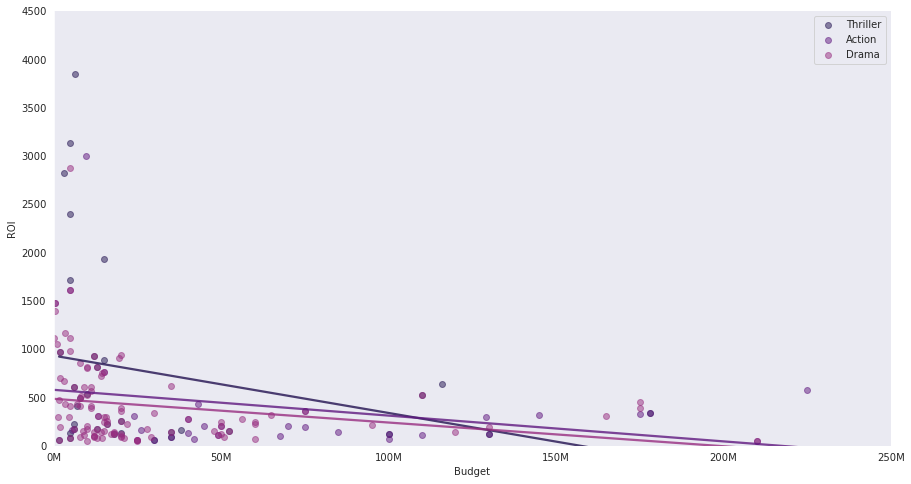

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (15,8))

for i in range(len(top_genres)):
    sns.regplot(data = df[(df[top_genres[i]] == 1)& (df['ROI'] > 50)],
                x='budget',
                y='ROI',
                label = top_genres[i],
                scatter_kws={'alpha':0.5},
                line_kws={'alpha':0.8},
                ci=None,
                ax = ax)
    
sns.despine()
ax.set_ylim(0, 4500)
ax.set_xlim(0, 250000000)

plt.legend()
plt.xlabel('Budget')
ticks = ax.get_xticks()
labels = [str(int(x)) + 'M' for x in ticks/1000000]
plt.xticks(ticks = ticks, labels = labels);

In [23]:
df_budget = df[['genre_list','budget','ROI']].copy()

In [24]:
df_budget['budget_class'] = pd.cut(
       df_budget['budget'], 
       bins = [1000000, 10000000, 25000000, 50000000, 100000000, df_budget['budget'].max()], 
       right = True,
       labels = ['Ultra Low (1M - 10M)', 'Low (10M - 25M)', 'Mid (25M - 50M)', 'High (50M - 100M)', 'Ultra High (100M+)']
)

In [25]:
df_budget = df_budget.explode('genre_list')

In [26]:
df_budget_bool = df_budget.genre_list.isin(top_genres)
df_budget = df_budget[df_budget_bool]

In [27]:
df_budget.groupby(['genre_list', 'budget_class']).count().head()

budget  ROI
genre_list budget_class                     
Action     Ultra Low (1M - 10M)       3    3
           Low (10M - 25M)            4    4
           Mid (25M - 50M)           10   10
           High (50M - 100M)          7    7
           Ultra High (100M+)         8    8

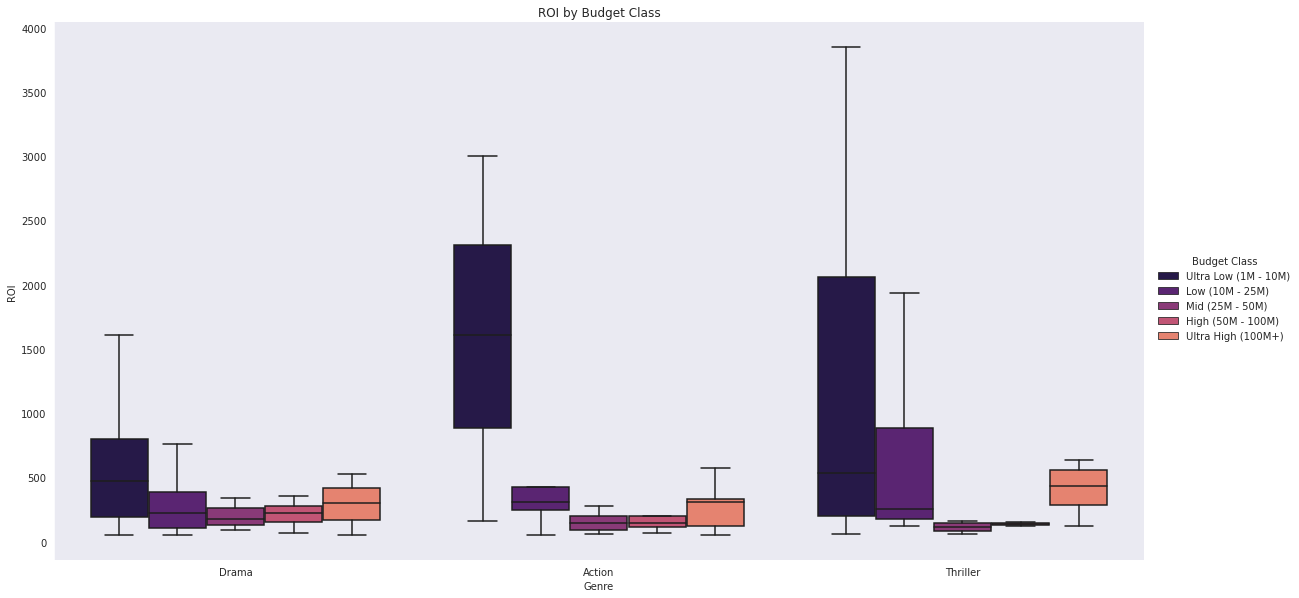

In [28]:
ax = sns.catplot(x="genre_list", 
            y="ROI", 
            hue="budget_class", 
            hue_order=['Ultra Low (1M - 10M)', 'Low (10M - 25M)', 'Mid (25M - 50M)', 'High (50M - 100M)', 'Ultra High (100M+)'], 
            kind="box", 
            height = 8,
            aspect = 2,
            showfliers = False, 
            data=df_budget)

ax._legend.set_title('Budget Class')

plt.title('ROI by Budget Class')
plt.xlabel('Genre');

_ROI is the main factor to be considered when making a movie and as we see Action and Thriller genre have much higher ROI on films made on Ultra Low budget (1M to 10M). so let's do further analysis based on Action and Thriller Genre_

### 3. Best Director, Based on Genre, ROI and Budget

In [29]:
top_genres = ['Thriller', 'Action']

In [30]:
df_c = df.copy()

In [31]:
df_c['mean_budget'] = df.groupby('title')['budget'].transform('mean')
df_c['mean_roi'] = df.groupby('title')['ROI'].transform('mean').round(0).astype(int)
df_c = df_c[((df_c['Thriller'] == 1) | (df_c['Action'] == 1))]

Text(0.5, 1.0, 'Highest ROI by Director')

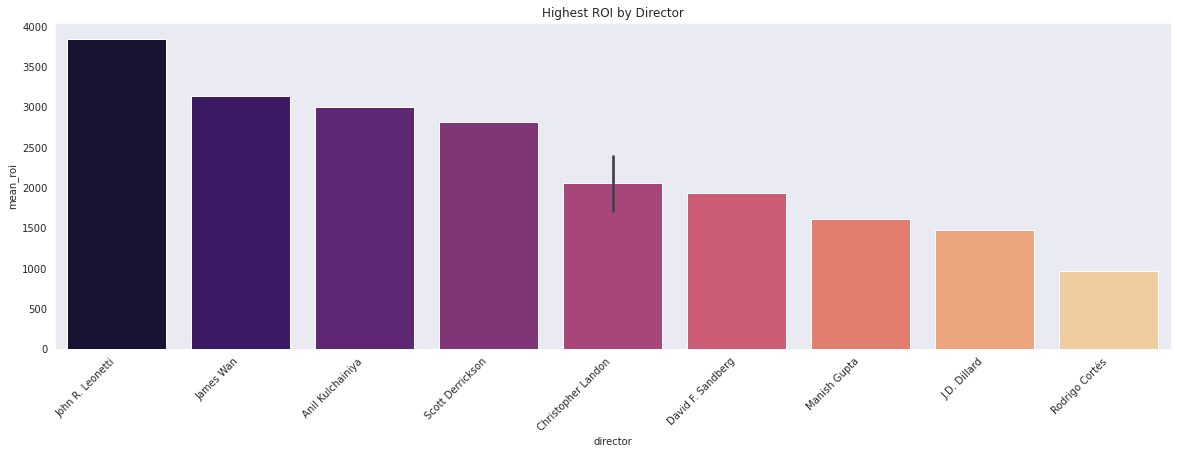

In [32]:
#plot the most profitable people
plot_df = df_c.sort_values('mean_roi', ascending=False)[:10]
plt.figure (figsize = (20, 6))
sns.barplot(data = plot_df,
            x = 'director',
            y = 'mean_roi',
            palette='magma')

# rotate ticks
plt.xticks(rotation = 45, ha = 'right');

plt.title('Highest ROI by Director')

In [33]:
directors_top = plot_df.director.unique()

In [34]:
df_genre_director_roi = df_c.explode('genre_list')

In [35]:
df_genre_director_roi.shape

(166, 31)

In [36]:
df_genre_director_roi = df_genre_director_roi[df_genre_director_roi['director'].isin(directors_top) 
                                              & df_genre_director_roi['genre_list'].isin(top_genres)]

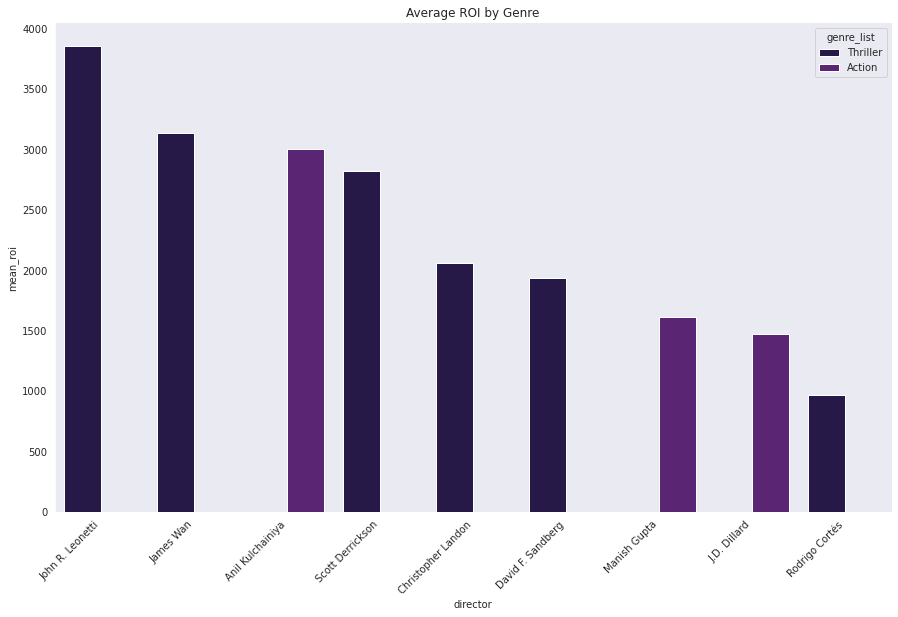

In [37]:
plt.figure (figsize = (15, 9))
plot_df = df_genre_director_roi.sort_values('mean_roi', ascending=False)
sns.barplot(data = plot_df,
                x = 'director',
                y = 'mean_roi',
                capsize = .2,
                hue = 'genre_list',
                alpha = 1,
                ci=None
                )
    
sns.despine()

# add and adjust labels
plt.xticks(rotation = 45, ha = 'right');
plt.title('Average ROI by Genre')
plt.show()